In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders_df = pd.read_excel("D://Afame technologies//Ecom data//ECOMM DATA.xlsx", sheet_name='Orders')
returns_df = pd.read_excel("D://Afame technologies//Ecom data//ECOMM DATA.xlsx", sheet_name='Returns')
people_df = pd.read_excel("D://Afame technologies//Ecom data//ECOMM DATA.xlsx", sheet_name='People')

In [3]:
orders_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [4]:
returns_df.head(2)

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM


In [5]:
people_df.head(2)

,Person,Region
0,Anna Andreadi,Central
1,Chuck Magee,South


In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [7]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1173 non-null   object
 1   Order ID  1173 non-null   object
 2   Market    1173 non-null   object
dtypes: object(3)
memory usage: 27.6+ KB


In [8]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  13 non-null     object
 1   Region  13 non-null     object
dtypes: object(2)
memory usage: 336.0+ bytes


In [9]:
orders_df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             24988
Quantity             14
Discount             27
Profit            27085
Shipping Cost     16936
Order Priority        4
dtype: int64

In [10]:
orders_df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [11]:
def missing_value_treatment_num(var):
    var = var.fillna(var.mode()[0])
    return var

In [12]:
orders_df = orders_df.apply(missing_value_treatment_num)

In [13]:
orders_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [14]:
orders_df['Ship Mode'].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

In [15]:
orders_df['Ship Mode'].value_counts()

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [16]:
orders_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [17]:
returns_df.columns

Index(['Returned', 'Order ID', 'Market'], dtype='object')

In [18]:
orders_df['Postal Code'].value_counts()

Postal Code
10035.0    41559
10024.0      230
10009.0      229
94122.0      203
10011.0      193
           ...  
92399.0        1
21740.0        1
57401.0        1
29730.0        1
83501.0        1
Name: count, Length: 631, dtype: int64

In [19]:
orders_df['Postal Code'].unique

<bound method Series.unique of 0        10024.0
1        10035.0
2        10035.0
3        10035.0
4        10035.0
          ...   
51285    10035.0
51286    77095.0
51287    93030.0
51288    10035.0
51289    10035.0
Name: Postal Code, Length: 51290, dtype: float64>

In [20]:
orders_df['Postal Code'].isnull().sum()

0

In [21]:
# Total Revenue and Profit Analysis
print("Total Sales: ", orders_df['Sales'].sum())
print("Total Profit: ", orders_df['Profit'].sum())

Total Sales:  12642501.909880001
Total Profit:  1467457.29128


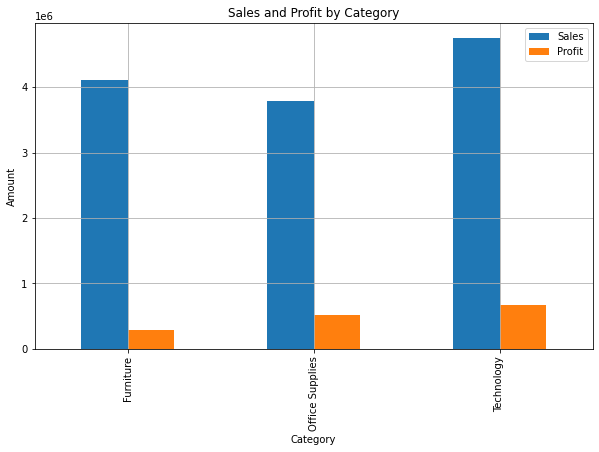

In [22]:
# Sales and Profit by Category
category_sales = orders_df.groupby('Category')[['Sales', 'Profit']].sum()
category_sales.plot(kind='bar', figsize=(10, 6), title='Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

In [23]:
# Extract the month
orders_df['Month'] = orders_df['Order Date'].dt.month
# the month as text (e.g., 'January', 'December'):
orders_df['Month Name'] = orders_df['Order Date'].dt.strftime('%B')

In [24]:
orders_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Month', 'Month Name'],
      dtype='object')

In [25]:
orders_df['Month'].value_counts()

Month
11    6342
12    6302
9     5975
6     5331
8     5078
10    4490
5     3747
7     3166
4     3057
3     3035
1     2599
2     2168
Name: count, dtype: int64

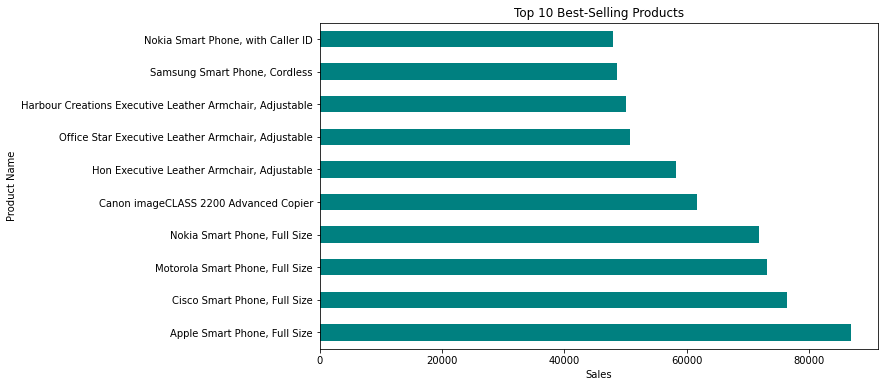

In [26]:
# Best-Selling Products
top_products = orders_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10, 6), color='teal', title='Top 10 Best-Selling Products')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

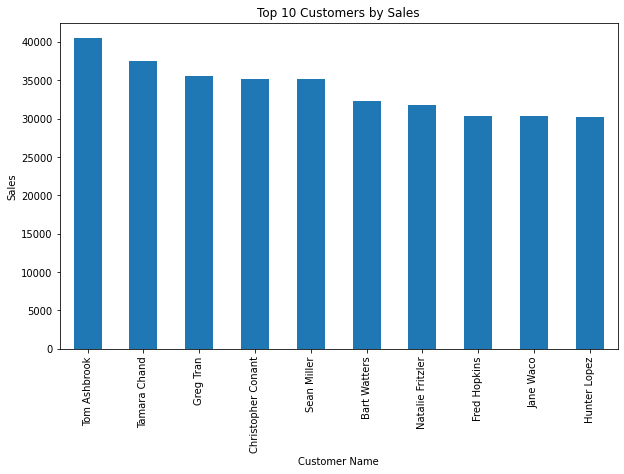

In [27]:
# Customer Segmentation - High Value Customers
customer_sales = orders_df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
customer_sales.plot(kind='bar', figsize=(10, 6), title='Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.show()

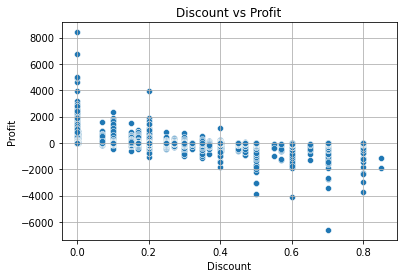

In [28]:
# Discounts and Profitability
sns.scatterplot(data=orders_df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

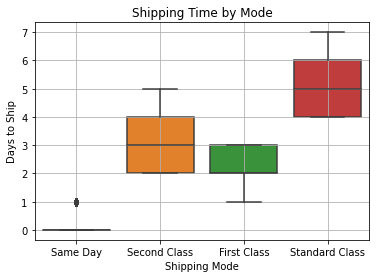

In [29]:
# Shipping Performance
orders_df['Ship Days'] = (pd.to_datetime(orders_df['Ship Date']) - orders_df['Order Date']).dt.days
sns.boxplot(data=orders_df, x='Ship Mode', y='Ship Days')
plt.title('Shipping Time by Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Days to Ship')
plt.grid(True)
plt.show()

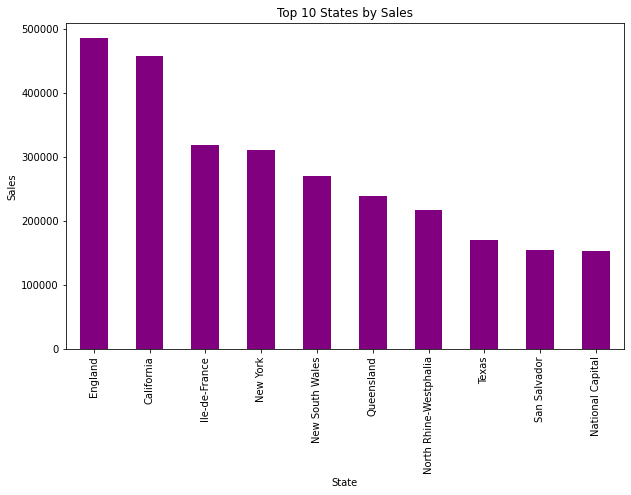

In [30]:
# Geographical Analysis - Sales by State
state_sales = orders_df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='bar', figsize=(10, 6), title='Top 10 States by Sales', color='purple')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

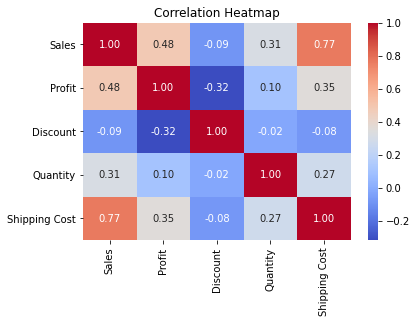

In [31]:
# Correlation Heatmap
numeric_cols = orders_df[['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping Cost']]
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Profitability Analysis by Product Category
category_profit_margin = (orders_df.groupby('Category')['Profit'].sum() / orders_df.groupby('Category')['Sales'].sum()) * 100
print("Profit Margin by Category:\n", category_profit_margin)

Profit Margin by Category:
 Category
Furniture           6.937812
Office Supplies    13.690632
Technology         13.990319
dtype: float64


In [33]:
# Order Prioritization Efficiency
priority_analysis = orders_df.groupby('Order Priority')[['Sales', 'Profit']].mean()
print("Order Priority Analysis:\n", priority_analysis)

Order Priority Analysis:
                      Sales     Profit
Order Priority                       
Critical        250.822854  31.593124
High            245.632420  27.119122
Low             234.251621  24.197958
Medium          247.371738  29.361729


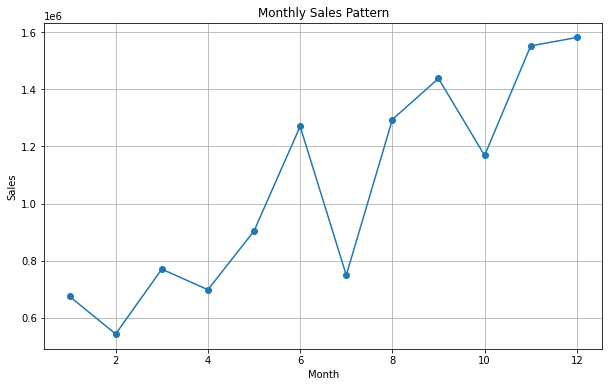

In [34]:
# Monthly Sales Pattern
monthly_sales = orders_df.groupby(orders_df['Order Date'].dt.month)['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6), title='Monthly Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

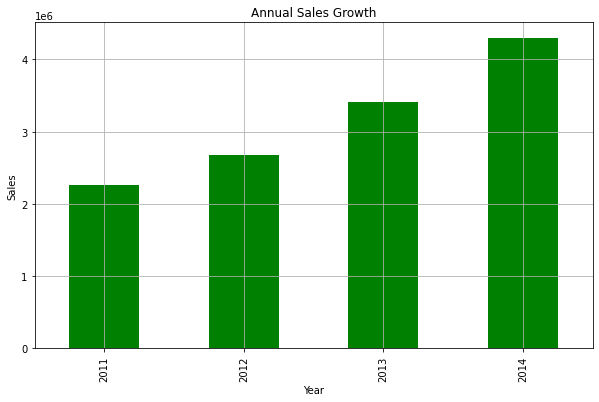

In [35]:
# Sales Trend - Yearly Growth Rate
orders_df['Year'] = orders_df['Order Date'].dt.year
annual_sales = orders_df.groupby('Year')['Sales'].sum()
annual_sales.plot(kind='bar', figsize=(10, 6), color='green', title='Annual Sales Growth')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Return Rate by Market:
 Market
LATAM            25.319693
United States    25.234442
APAC             25.234442
EU               24.211424
Name: proportion, dtype: float64


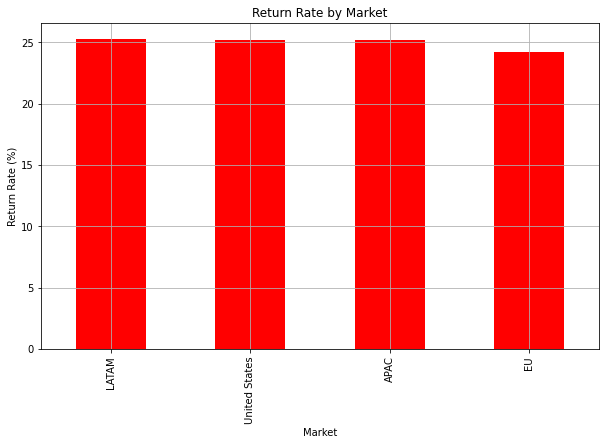

In [38]:
# Return rate by market
return_rate_market = returns_df['Market'].value_counts(normalize=True) * 100
print("Return Rate by Market:\n", return_rate_market)

return_rate_market.plot(kind='bar', figsize=(10, 6), color='red', title='Return Rate by Market')
plt.xlabel('Market')
plt.ylabel('Return Rate (%)')
plt.grid(True)
plt.show()

Total Sales of Returned Orders:  819768.37938
Total Profit of Returned Orders:  117998.82357999997


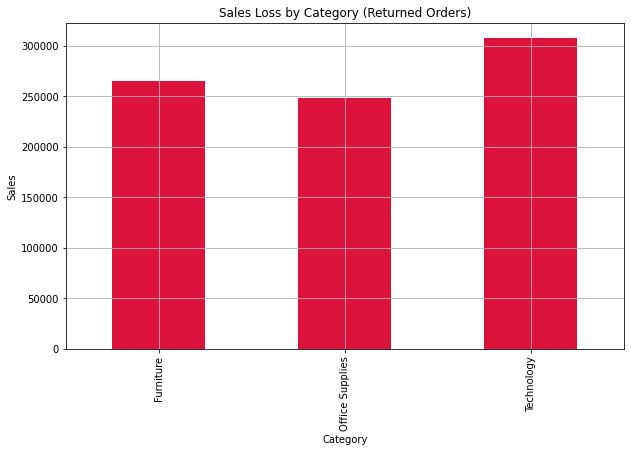

In [39]:
# Merge orders_df with returns_df on 'Order ID'
merged_df = orders_df.merge(returns_df, on='Order ID', how='left')

# Analyze Sales and Profit of Returned Orders
returned_orders = merged_df[merged_df['Returned'] == 'Yes']
print("Total Sales of Returned Orders: ", returned_orders['Sales'].sum())
print("Total Profit of Returned Orders: ", returned_orders['Profit'].sum())

# Visualization
returned_orders.groupby('Category')['Sales'].sum().plot(kind='bar', figsize=(10, 6), color='crimson', title='Sales Loss by Category (Returned Orders)')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

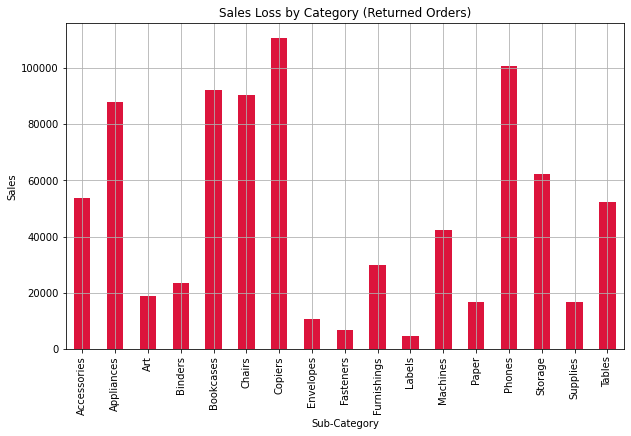

In [41]:
returned_orders.groupby('Sub-Category')['Sales'].sum().plot(kind='bar', figsize=(10, 6), color='crimson', title='Sales Loss by Sub-Category (Returned Orders)')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [42]:
people_df.columns

Index(['Person', 'Region'], dtype='object')

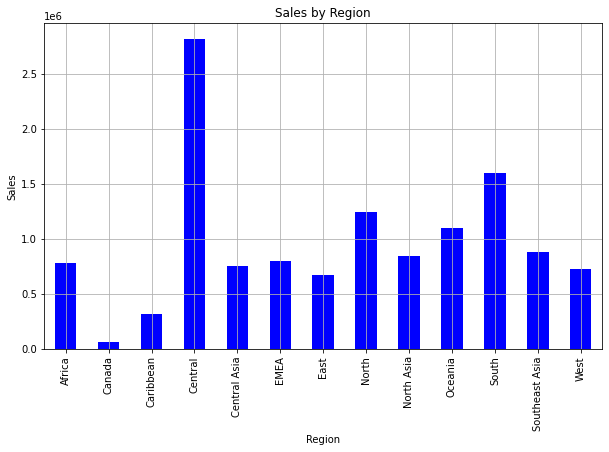

In [43]:
# Merge people_df with orders_df based on Region
merged_people_orders = orders_df.merge(people_df, on='Region', how='left')

# Sales by Region
regional_sales = merged_people_orders.groupby('Region')['Sales'].sum()
regional_sales.plot(kind='bar', figsize=(10, 6), title='Sales by Region', color='blue')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

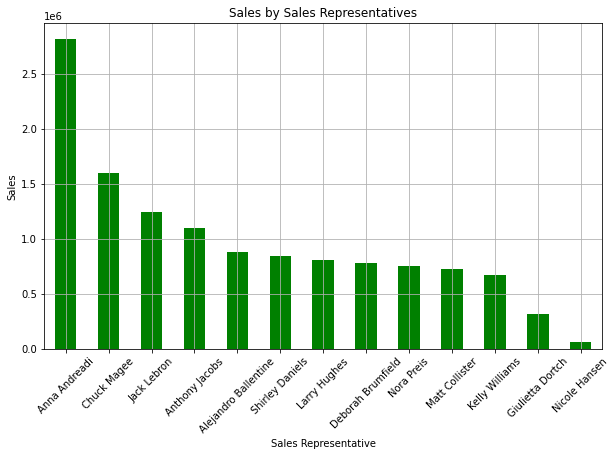

In [44]:
# Sales by Person
person_sales = merged_people_orders.groupby('Person')['Sales'].sum().sort_values(ascending=False)
person_sales.plot(kind='bar', figsize=(10, 6), color='green', title='Sales by Sales Representatives')
plt.xlabel('Sales Representative')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()